In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from IPython import display
import numpy as np
from sklearn.cluster import AffinityPropagation
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [22]:
df = pd.read_csv('/Users/Simple/Downloads/ML UoL/EWCS_2016.csv', sep=',')
df

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1,63,3,3,3,3,3,2,2,2,2
1,2,58,2,3,2,3,2,2,3,2,2
2,2,32,2,2,3,2,3,2,2,2,2
3,1,35,3,2,2,2,3,2,2,2,2
4,2,27,2,2,3,3,2,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
7808,1,35,3,2,3,2,3,4,3,3,2
7809,1,53,2,1,2,1,2,1,1,2,2
7810,2,39,1,1,1,1,1,2,5,2,1
7811,2,75,1,1,1,5,1,1,1,3,1


In [23]:
df.describe()

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,1.362985,41.799821,-1.152694,-0.590810,-1.164085,-0.608217,-3.480353,-1.970050,-1.901574,-1.149878,-7.946243
std,11.329936,41.000523,59.857251,56.584189,59.857237,57.708142,76.627067,63.948641,63.955457,57.670846,96.918984
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.000000,34.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,52.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
max,2.000000,87.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
df.isnull().values.any()

False

In [25]:
for col in df.columns:
    df = df.loc[df[col] != -999]

In [26]:
corr = df.corr()

In [27]:
mask = np.zeros_like(corr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

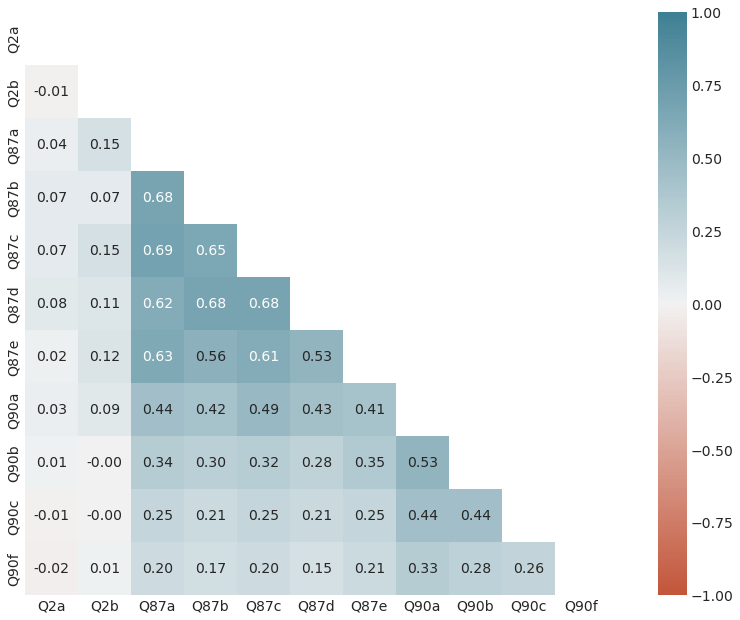

In [28]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(16, 10))
    color = sns.diverging_palette(20, 220, as_cmap=True)
    ax = sns.heatmap(corr, vmin=-1, vmax=1, cmap=color, square=True, center=0, mask=mask, annot=True, fmt=".2f", annot_kws = {"size": 14})



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distr

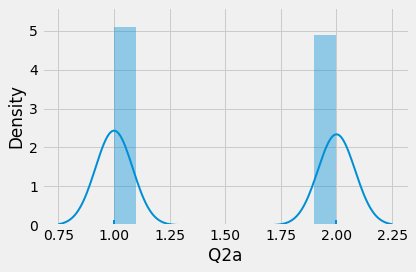

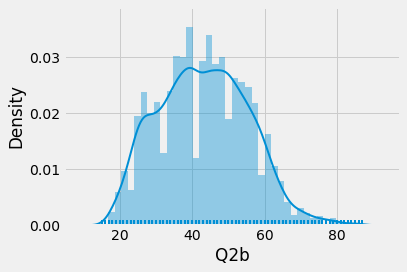

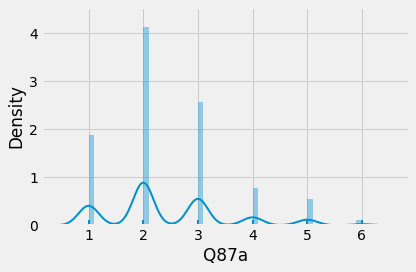

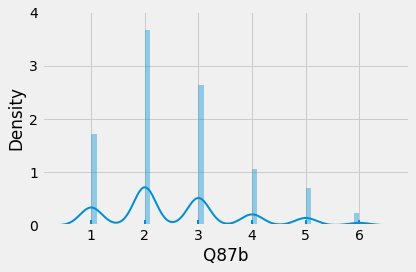

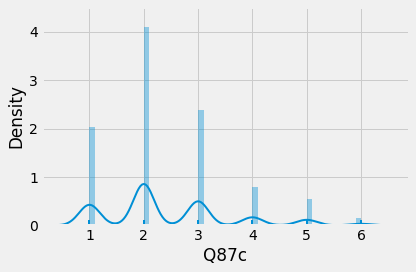

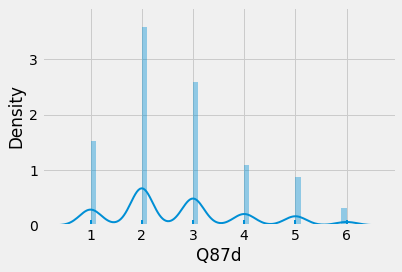

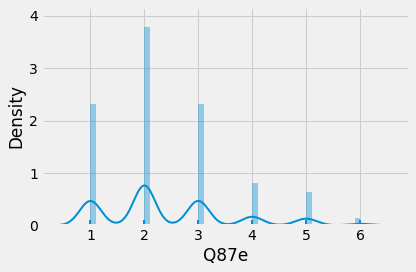

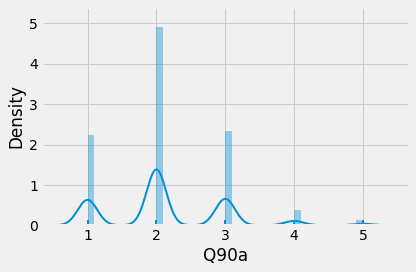

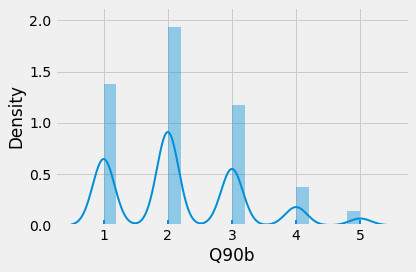

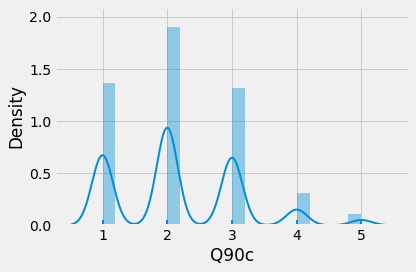

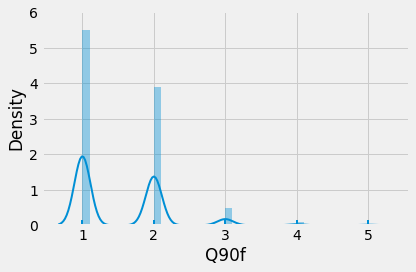

In [29]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.distplot(df[col], rug=True, kde_kws={"lw": 2, }, rug_kws={'lw': 2} )
    plt.tight_layout()
    

array([[<AxesSubplot:title={'center':'Q2a'}>,
        <AxesSubplot:title={'center':'Q2b'}>,
        <AxesSubplot:title={'center':'Q87a'}>],
       [<AxesSubplot:title={'center':'Q87b'}>,
        <AxesSubplot:title={'center':'Q87c'}>,
        <AxesSubplot:title={'center':'Q87d'}>],
       [<AxesSubplot:title={'center':'Q87e'}>,
        <AxesSubplot:title={'center':'Q90a'}>,
        <AxesSubplot:title={'center':'Q90b'}>],
       [<AxesSubplot:title={'center':'Q90c'}>,
        <AxesSubplot:title={'center':'Q90f'}>, <AxesSubplot:>]],
      dtype=object)

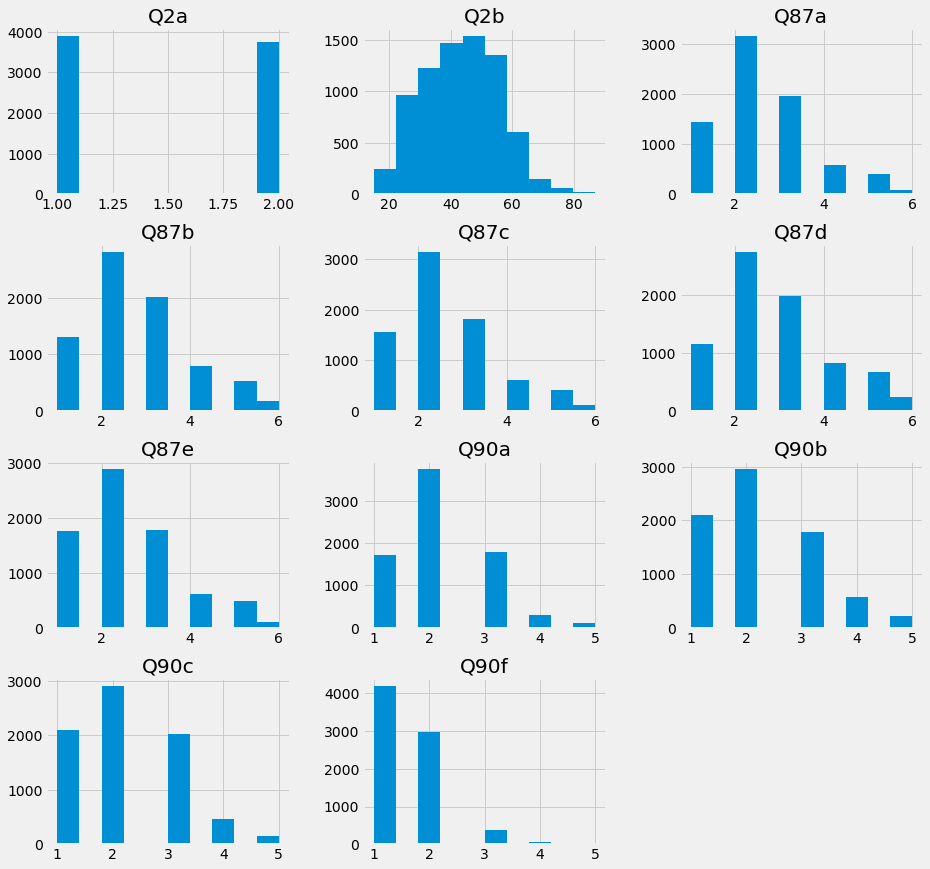

In [30]:
df.hist(figsize= [14,14])

In [31]:
features = df.values

In [32]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

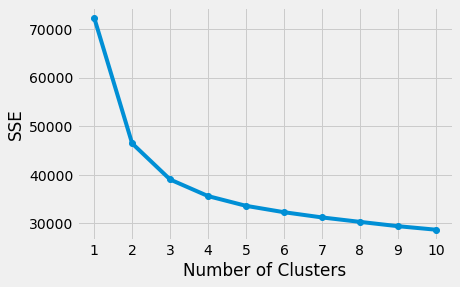

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [35]:
clust = 2
model = KMeans(
    init="k-means++",
    n_clusters=clust,
    n_init=10,
    max_iter=300,
    random_state=42
)

model.fit(scaled_features)

KMeans(n_clusters=2, random_state=42)

In [36]:
cluster_data = model.transform(scaled_features)

label = model.labels_

In [37]:
df['cluster_num'] = label
cluster_df = df.groupby('cluster_num').mean()
cluster_df

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
cluster_num,,,,,,,,,,,
0,1.522711,45.267645,3.387142,3.676450,3.439203,3.851852,3.348707,2.627533,2.627184,2.498253,1.706848
1,1.470637,41.899687,1.851411,1.965935,1.802508,2.038662,1.844723,1.826541,1.935005,1.982236,1.425078


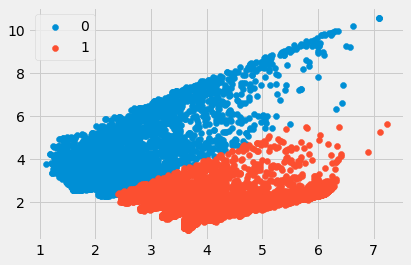

In [38]:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(cluster_data[label == i, 0] , cluster_data[label == i, 1] , label = i)
plt.legend()
plt.show()

Part 2

In [39]:
df_mat = pd.read_csv('/Users/Simple/Downloads/ML UoL/student-mat.csv', sep=';')
df_por = pd.read_csv('/Users/Simple/Downloads/ML UoL/student-por.csv', sep=';')

In [40]:
df_mat.shape()

TypeError: 'tuple' object is not callable

In [ ]:
df_por.shape()

(649, 33)

In [ ]:
df_mat.dtypes()

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
df_por.dtypes()

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df_por.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


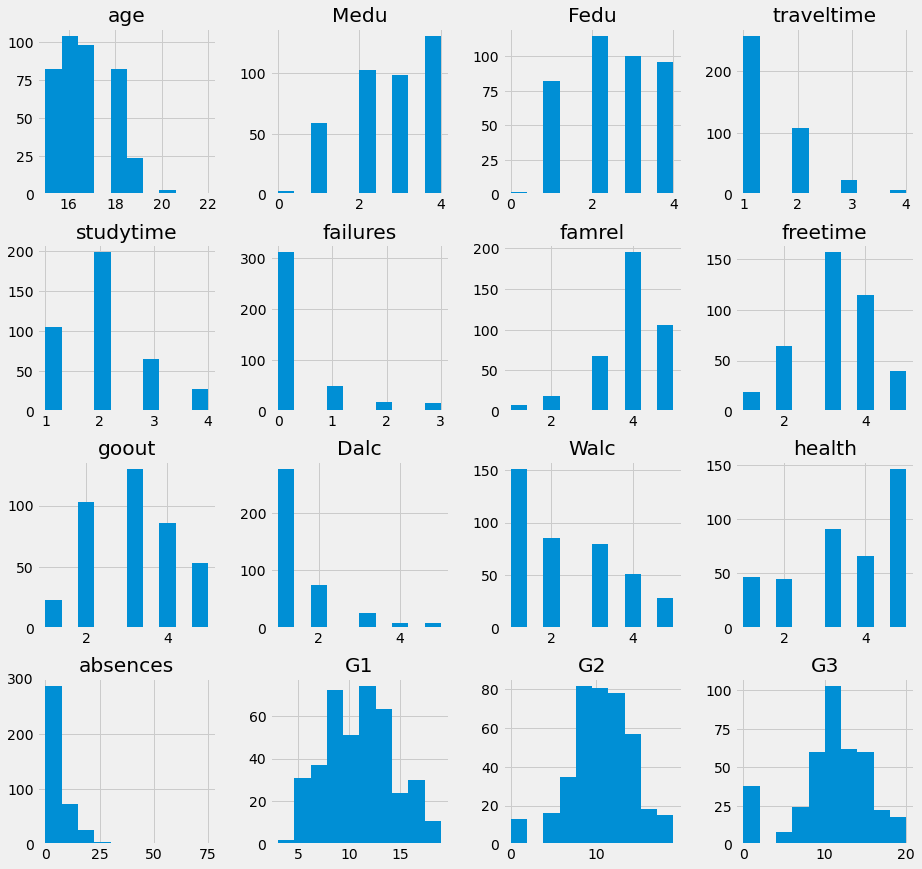

In [ ]:
df_mat.hist(figsize = [14,14])

plt.show()

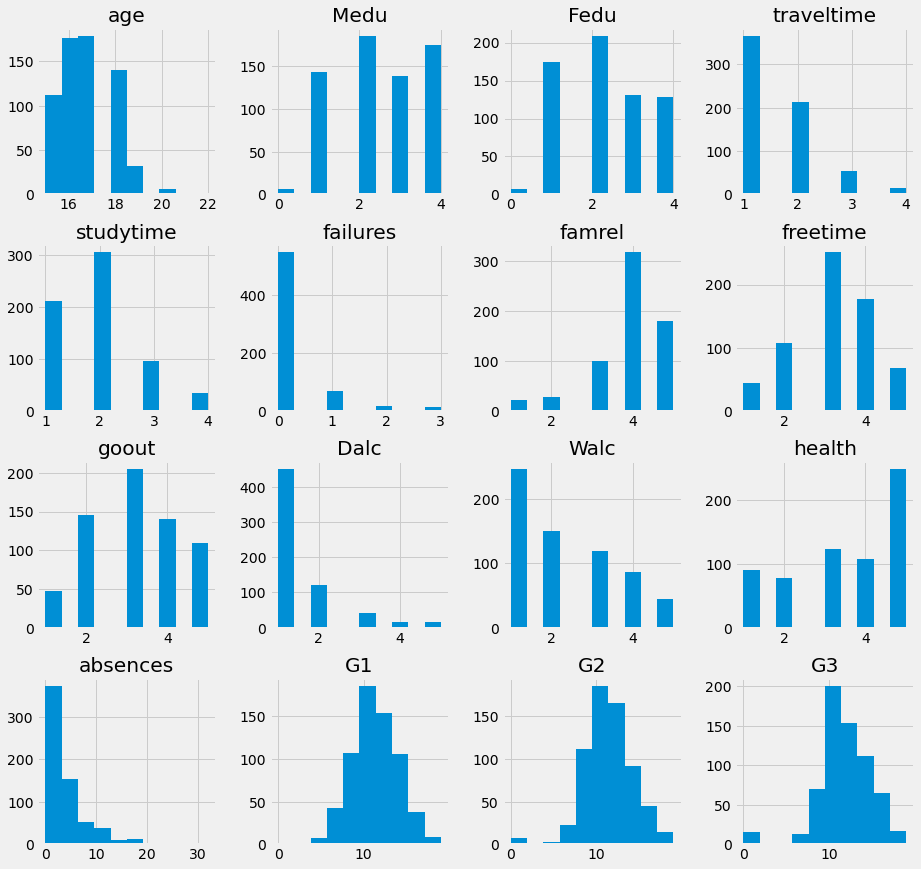

In [ ]:
df_por.hist(figsize = [14,14])

plt.show()

In [ ]:
#numerical data summary
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
#categorical data summary
df_mat.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df_por.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


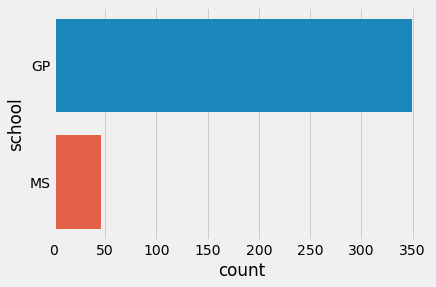

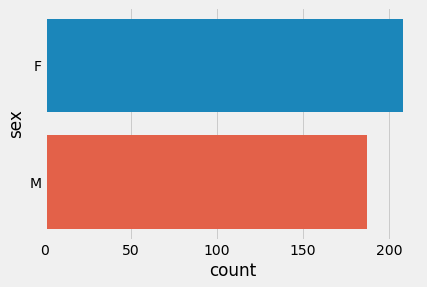

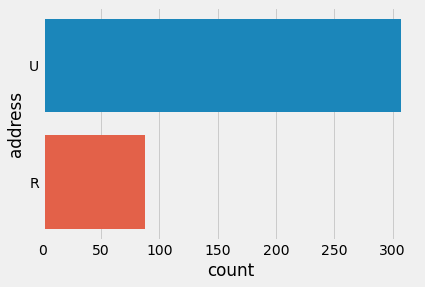

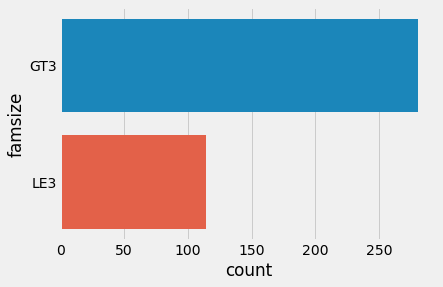

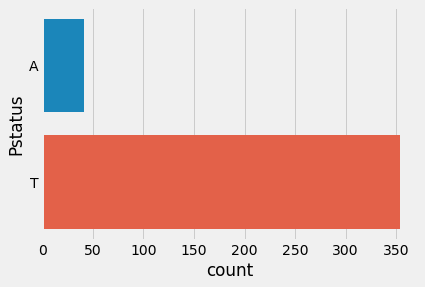

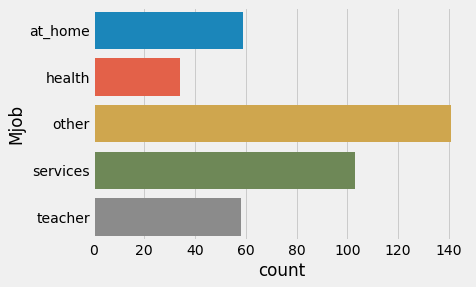

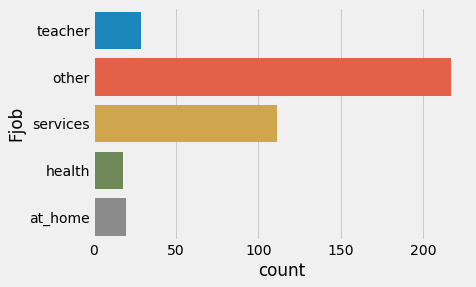

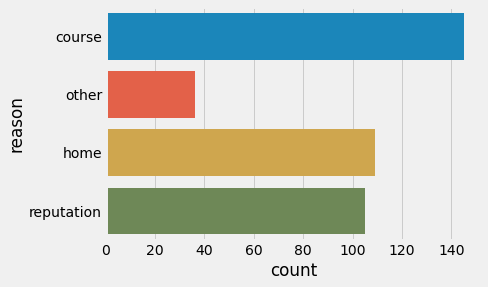

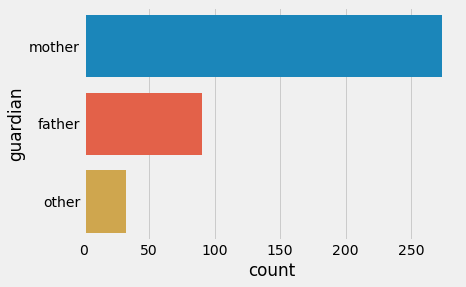

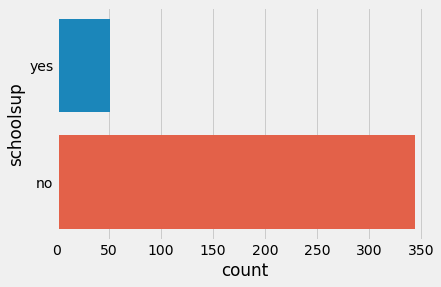

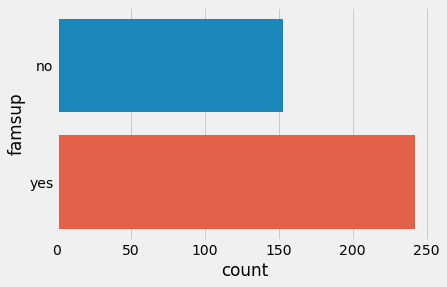

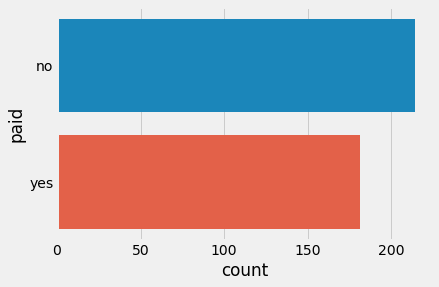

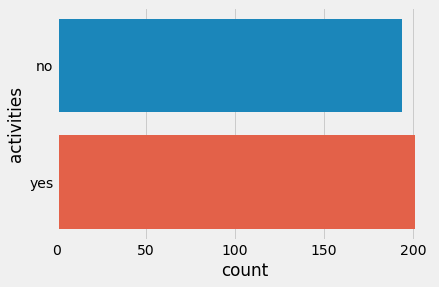

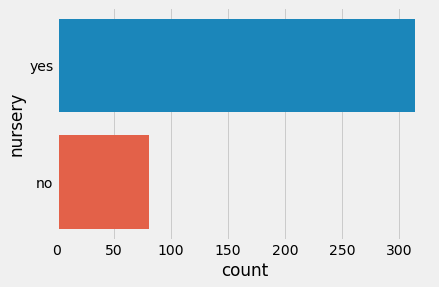

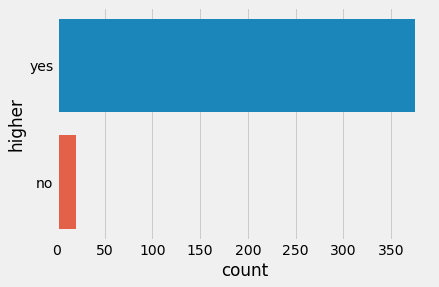

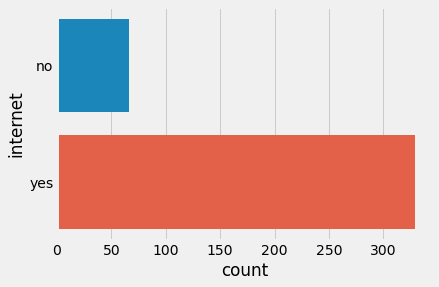

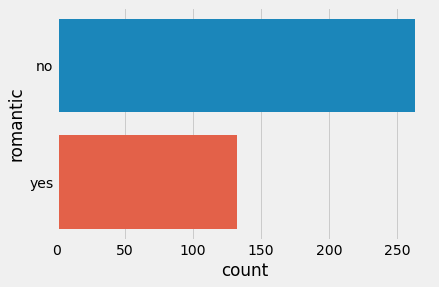

In [ ]:
for f in df_mat.dtypes[df_mat.dtypes =='object'].index:
    sns.countplot(y = f, data = df_mat)
    plt.show()

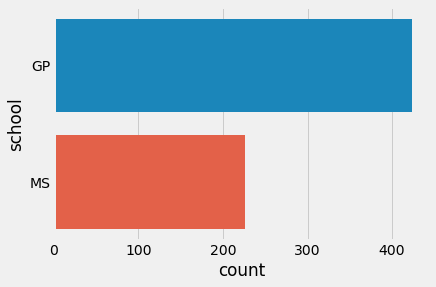

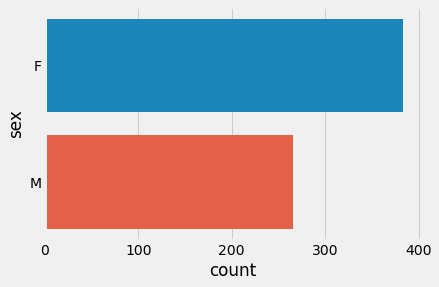

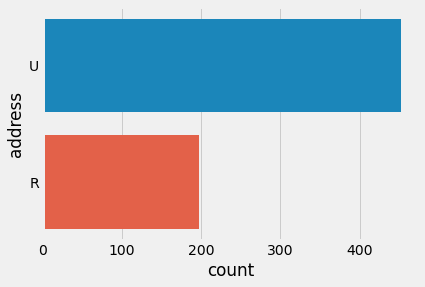

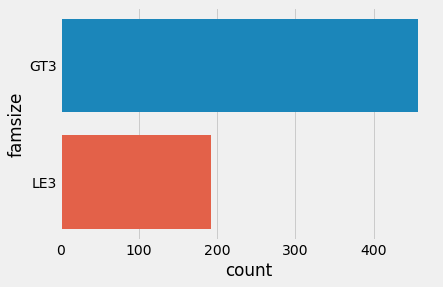

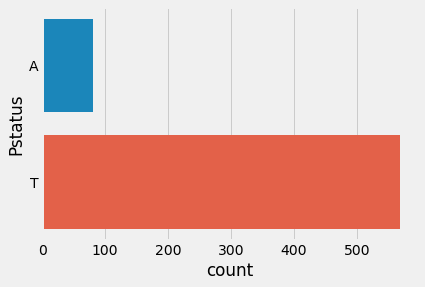

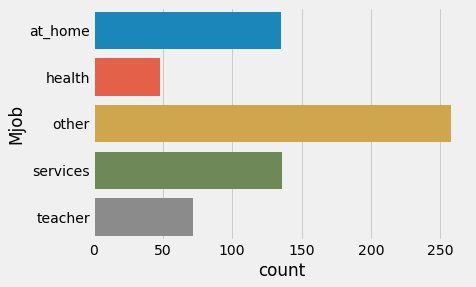

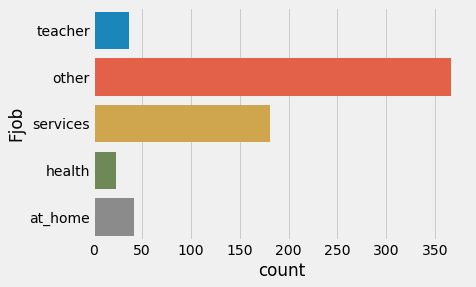

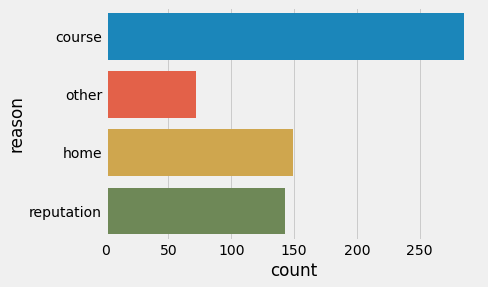

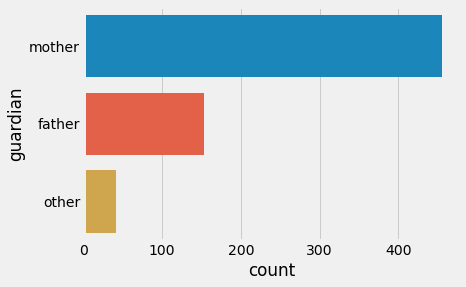

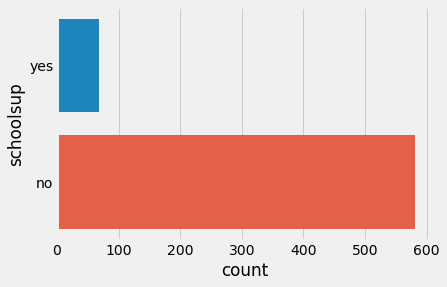

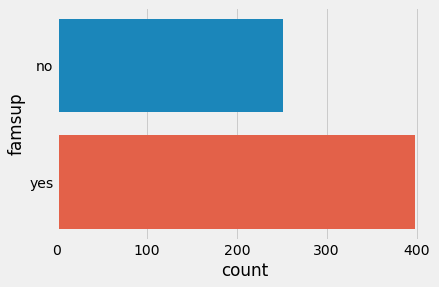

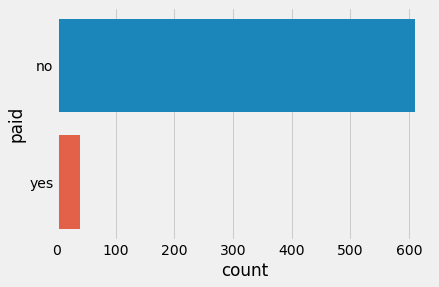

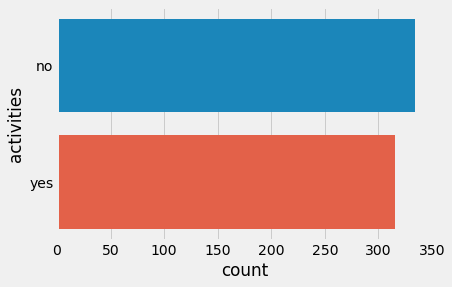

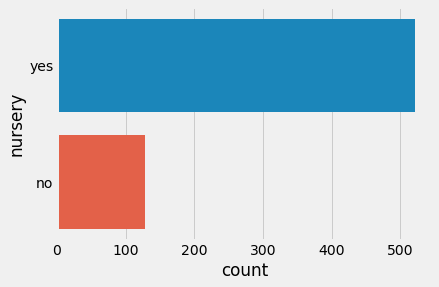

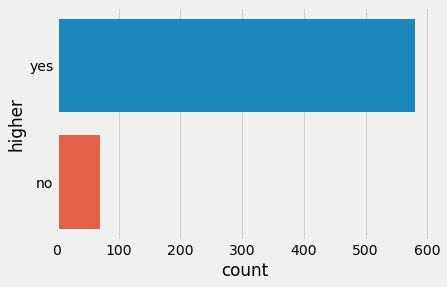

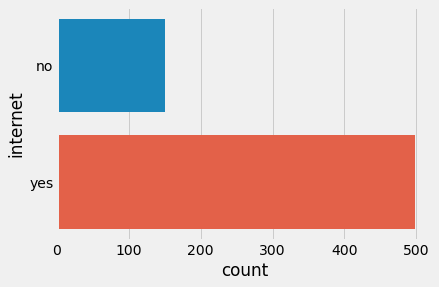

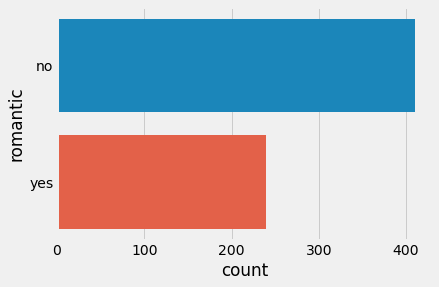

In [ ]:
for f in df_por.dtypes[df_por.dtypes =='object'].index:
    sns.countplot(y = f, data = df_por)
    plt.show()

In [ ]:
for column in df_mat.columns:
    
    if df_mat[column].dtypes == 'object':
        unique_val = df_mat[column].unique()
        encode = dict()
        
        for i, val in enumerate(unique_val):
            encode[val] = i
        
        for row in [column]:
            df_mat = df_mat.replace({str(row): encode})

In [ ]:
for column in df_por.columns:

    if df_por[column].dtypes == 'object':
        unique_val = df_por[column].unique()
        encode = dict()
        
        for i, val in enumerate(unique_val):
            encode[val] = i
        
        for row in [column]:
            df_por = df_por.replace({str(row): encode})

In [ ]:
corr_mat = df_mat.corr()

In [ ]:
mask_mat = np.zeros_like(corr_mat)
triangle_indices = np.triu_indices_from(mask_mat)
mask_mat[triangle_indices] = True
mask_mat

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

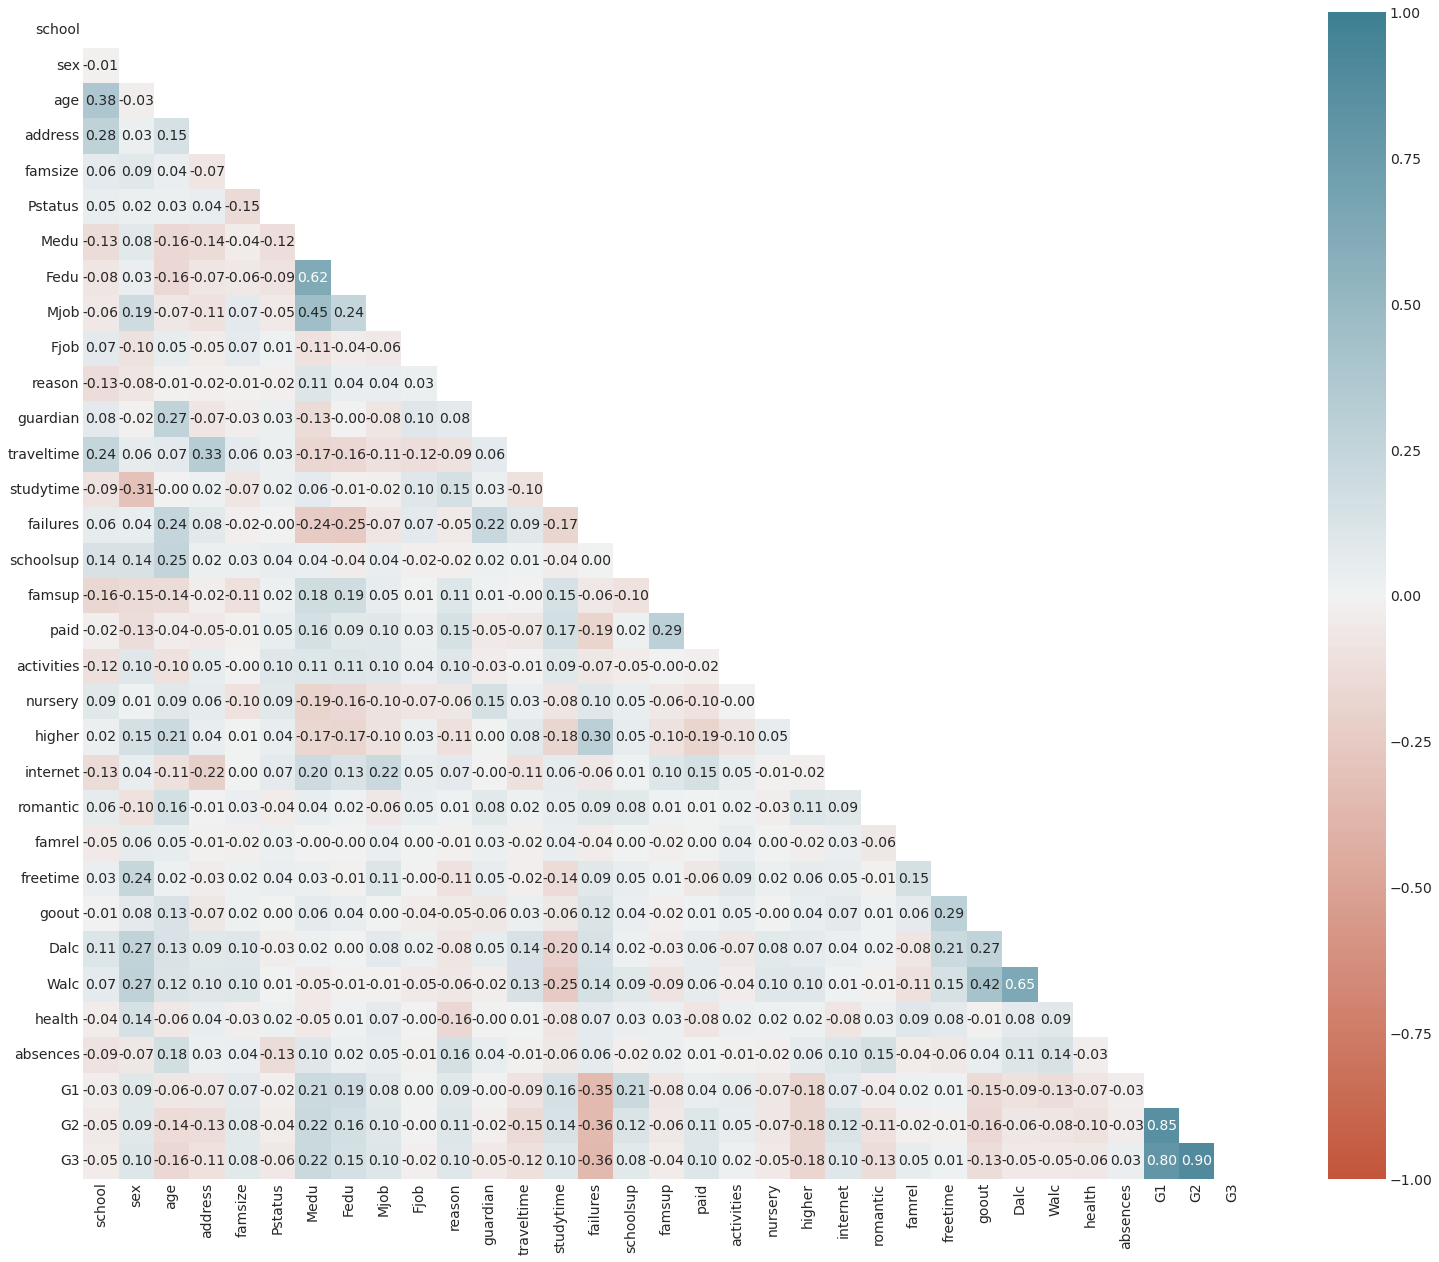

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(25, 20))
    color = sns.diverging_palette(20, 220, as_cmap=True)
    ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap=color, square=True, center=0, mask=mask_mat, annot=True, fmt=".2f", annot_kws = {"size": 14})

In [ ]:
corr_por = df_por.corr()

In [ ]:
mask_por = np.zeros_like(corr_por)
triangle_indices = np.triu_indices_from(mask_por)
mask_por[triangle_indices] = True
mask_por

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

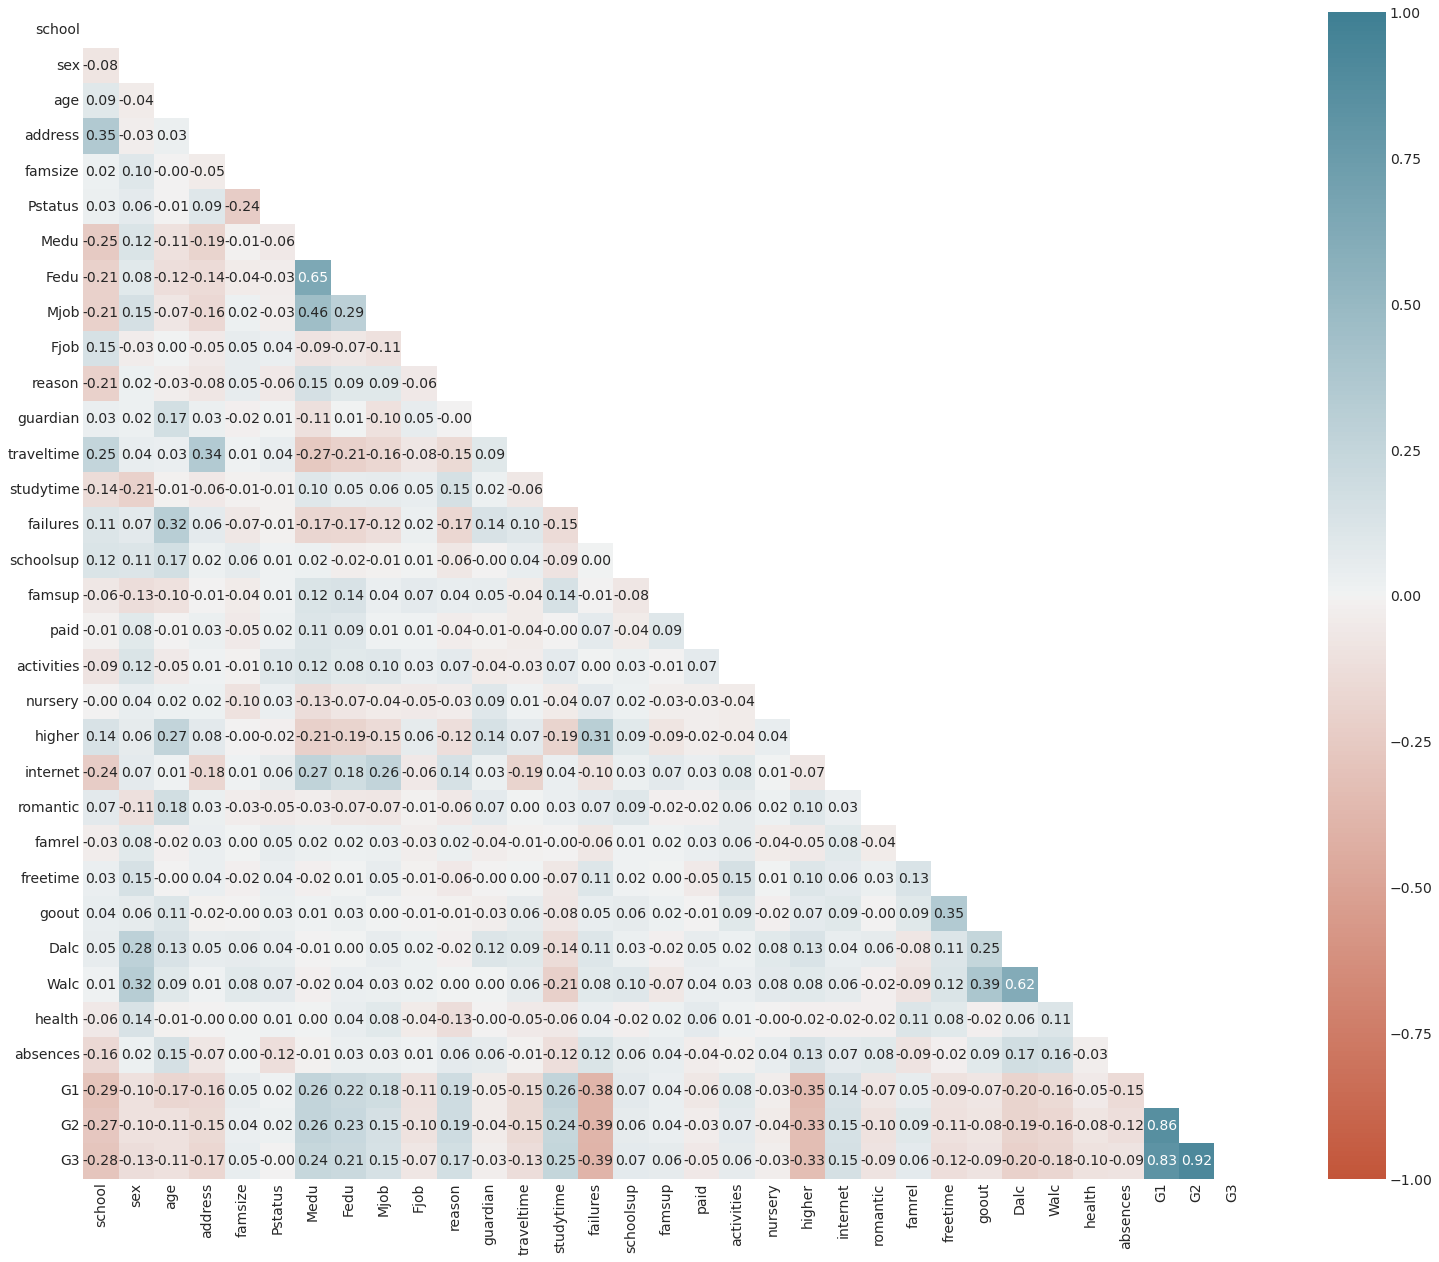

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(25, 20))
    color = sns.diverging_palette(20, 220, as_cmap=True)
    ax = sns.heatmap(corr_por, vmin=-1, vmax=1, cmap=color, square=True, center=0, mask=mask_por, annot=True, fmt=".2f", annot_kws = {"size": 14})

In [ ]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:

normalize_length = min(df_mat.shape[0], df_por.shape[0])
print(normalize_length)
y_mat = df_mat['G3'][:normalize_length]
X_mat = df_mat.iloc[:normalize_length, :]
X_mat1 = X_mat.drop(columns = ['G1', 'G2', 'G3'])

y_por = df_por['G3'][:normalize_length]
X_por = df_por.iloc[:normalize_length, :]
X_por1 = X_por.drop(columns = ['G1', 'G2', 'G3'])

395


In [ ]:
x_mat1_train,x_mat1_test,y_mat1_train,y_mat1_test = train_test_split(X_mat1, y_mat, test_size=0.2, random_state=42)
print(len(x_mat1_train))
print(len(x_mat1_test))
print(len(y_mat1_train))
print(len(y_mat1_test))

x_por1_train,x_por1_test,y_por1_train,y_por1_test = train_test_split(X_por1, y_por, test_size=0.2, random_state=42)

316
79
316
79


In [ ]:
rg_linear = LinearRegression()
rg_ridge = Ridge()
rg_rf = RandomForestRegressor()
rg_dt = DecisionTreeRegressor()

In [ ]:
model_list = {'linear_regression':rg_linear,           
              'ridge_regression': rg_ridge,  
              'random_forrest': rg_rf, 
              'decision_tree': rg_dt}

In [ ]:
# a for loop to train the models all in once
fitted_models_mat = {}
for name, model_mat in model_list.items():
    model_mat.fit(x_mat1_train, y_mat1_train)
    
    fitted_models_mat[name] = model_mat

In [ ]:
# a for loop to train the models all in once
fitted_models_por = {}
for name, model_por in model_list.items():
    model_por.fit(x_por1_train, y_por1_train)
    
    fitted_models_por[name] = model_por

In [ ]:
# a for loop to predict the results using all the different models

prediction_mat = {}
for name, model_mat in fitted_models_mat.items():
    pred_mat = model_mat.predict(x_mat1_test)
    
    prediction_mat[name] = pred_mat

In [ ]:
# a for loop to predict the results using all the different models

prediction_por = {}
for name, model_por in fitted_models_por.items():
    pred_por = model_por.predict(x_por1_test)
    
    prediction_por[name] = pred_por

In [ ]:
# Calculate and print R^2 and MAE
for name, pred_mat in prediction_mat.items():
    print(name)
    print( 'MAE:', metrics.mean_absolute_error(y_mat1_test, pred_mat))
    print( 'MSE:', metrics.mean_squared_error(y_mat1_test, pred_mat))
    print( 'RMSE:', np.sqrt(metrics.mean_squared_error(y_mat1_test, pred_mat)))
    print('\n')

linear_regression
MAE: 3.4575096032953443
MSE: 21.920300711143035
RMSE: 4.681912078536187


ridge_regression
MAE: 3.4452989388908355
MSE: 21.82213112029733
RMSE: 4.671416393375496


random_forrest
MAE: 3.310632911392406
MSE: 20.98633417721519
RMSE: 4.581084388789972


decision_tree
MAE: 3.8734177215189876
MSE: 26.68354430379747
RMSE: 5.165611706642057




In [ ]:

for name, pred_por in prediction_por.items():
    print(name)
    print( 'MAE:', metrics.mean_absolute_error(y_por1_test, pred_por))
    print( 'MSE:', metrics.mean_squared_error(y_por1_test, pred_por))
    print( 'RMSE:', np.sqrt(metrics.mean_squared_error(y_por1_test, pred_por)))
    print('\n')

linear_regression
MAE: 1.8941036491936325
MSE: 5.039729129760779
RMSE: 2.2449341036566706


ridge_regression
MAE: 1.8890620703633485
MSE: 5.00621888619723
RMSE: 2.237458130602052


random_forrest
MAE: 1.8039240506329113
MSE: 4.963864556962025
RMSE: 2.2279731948481842


decision_tree
MAE: 2.670886075949367
MSE: 11.227848101265822
RMSE: 3.3507981289934228




Part 3

In [ ]:
df_bank = pd.read_csv('/Users/Simple/Downloads/ML UoL/bank.csv', sep=';')

In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df_bank.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [ ]:
for column in df_bank.columns:
    
    if df_bank[column].dtypes == 'object':
        unique_val = df_bank[column].unique()
        encode = dict()
        
        for i, val in enumerate(unique_val):
            encode[val] = i
        
        for row in [column]:
            df_bank = df_bank.replace({str(row): encode})

In [ ]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='y'>

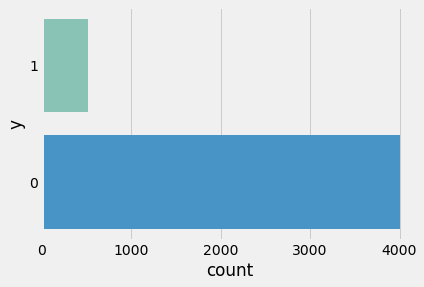

In [ ]:
sns.countplot(y=df_bank['y'], data=df_bank, palette=['#7fcdbb',"#3498db"], order=df_bank['y'].value_counts().sort_values().index)

In [ ]:
corr_bank = df_bank.corr()

In [ ]:
mask_bank = np.zeros_like(corr_bank)
triangle_indices = np.triu_indices_from(mask_bank)
mask_bank[triangle_indices] = True
mask_bank

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

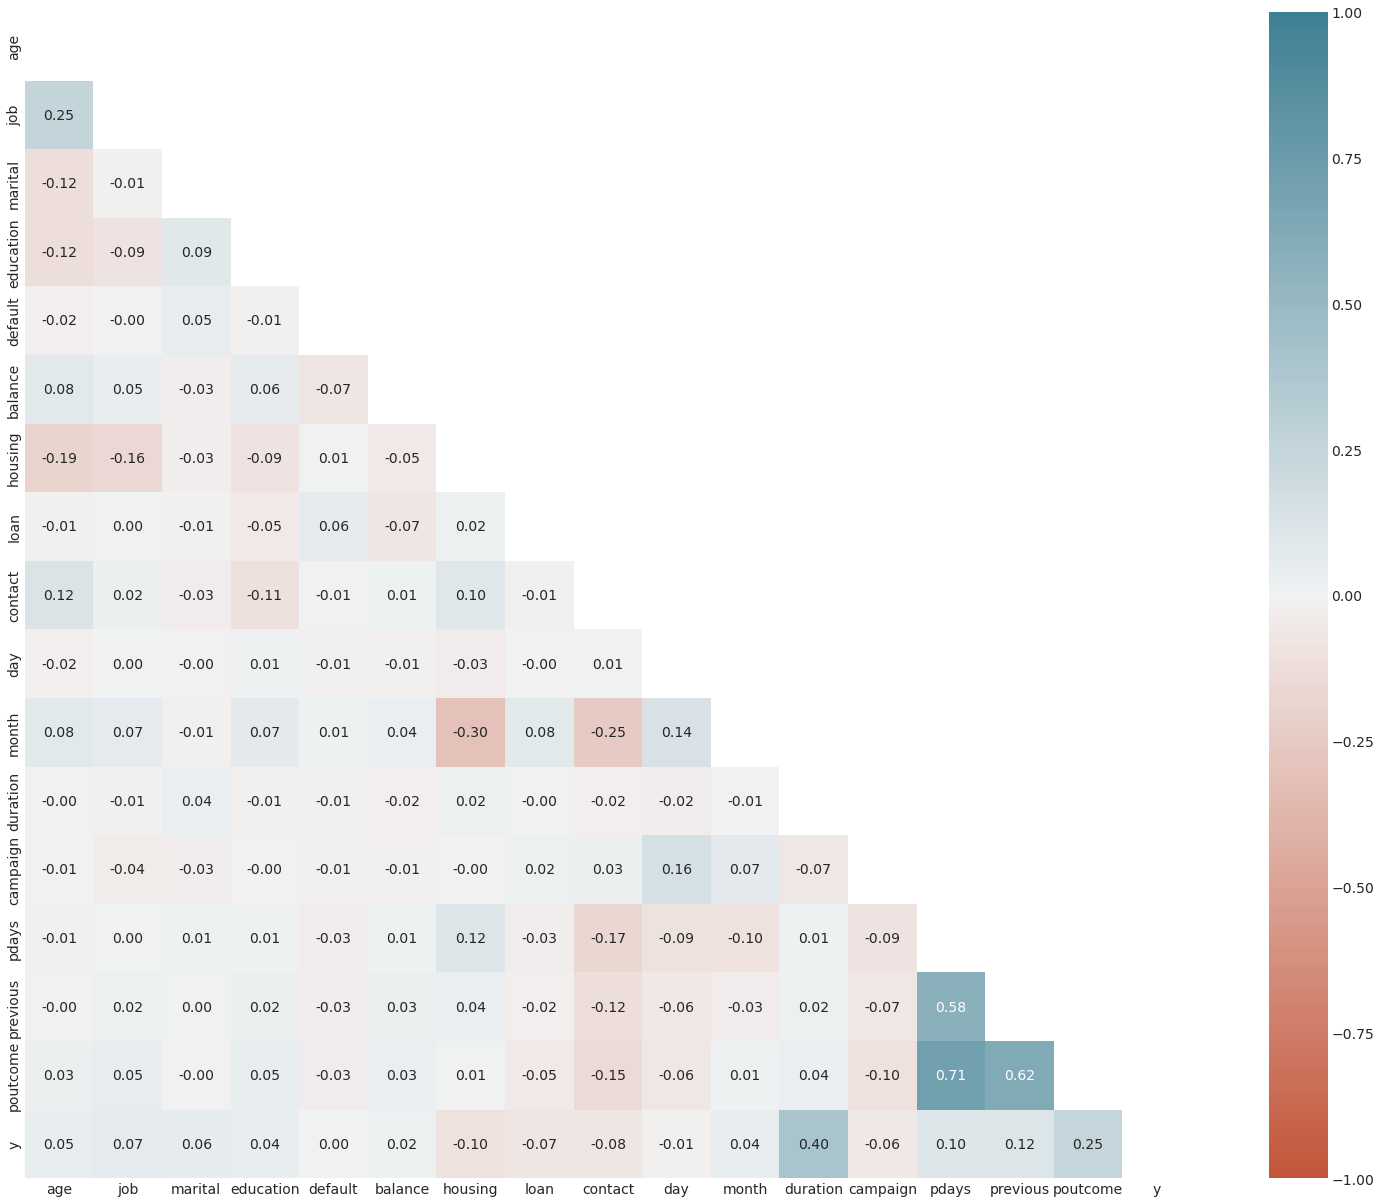

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(25, 20))
    color = sns.diverging_palette(20, 220, as_cmap=True)
    ax = sns.heatmap(corr_bank, vmin=-1, vmax=1, cmap=color, square=True, center=0, mask=mask_bank, annot=True, fmt=".2f", annot_kws = {"size": 14})

In [ ]:
y_0 = df_bank[df_bank['y'] == 0].sample(frac=1).iloc[:521]
y_0

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2099,52,2,0,2,0,6922,0,0,0,20,8,371,1,-1,0,0,0
2223,42,3,2,1,0,47,1,1,1,8,1,141,1,-1,0,0,0
568,59,0,0,0,0,0,0,0,0,30,6,3025,2,-1,0,0,0
2618,54,1,0,1,0,812,0,0,0,31,7,113,6,-1,0,0,0
147,48,5,0,1,0,1152,1,0,0,21,7,168,5,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,41,1,0,3,0,88,1,0,0,11,1,105,1,336,2,1,0
2565,23,3,1,3,0,817,1,0,0,18,1,123,1,-1,0,0,0
3898,59,3,0,0,0,748,0,0,1,29,1,184,1,-1,0,0,0
4515,32,1,1,1,0,473,1,0,0,7,7,624,5,-1,0,0,0


In [ ]:
y_1 = df_bank[df_bank['y'] == 1]
y_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,8,1,1,0,502,0,0,0,30,2,261,1,-1,0,0,1
30,68,10,2,1,0,4189,0,0,2,14,7,897,2,-1,0,0,1
33,32,2,1,2,0,2536,1,0,0,26,5,958,6,-1,0,0,1
34,49,5,0,2,0,1235,0,0,0,13,5,354,3,-1,0,0,1
36,78,10,2,0,0,229,0,0,2,22,0,97,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,5,1,1,0,668,1,0,1,28,1,576,3,-1,0,0,1
4503,60,4,0,0,0,362,0,1,0,29,7,816,6,-1,0,0,1
4504,42,3,1,1,0,1080,1,1,0,13,1,951,3,370,4,1,1
4505,32,7,1,1,0,620,1,0,1,26,1,1234,3,-1,0,0,1


In [ ]:
df_bank1 = pd.concat([y_0, y_1]).reset_index()
df_bank1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2099,52,2,0,2,0,6922,0,0,0,20,8,371,1,-1,0,0,0
1,2223,42,3,2,1,0,47,1,1,1,8,1,141,1,-1,0,0,0
2,568,59,0,0,0,0,0,0,0,0,30,6,3025,2,-1,0,0,0
3,2618,54,1,0,1,0,812,0,0,0,31,7,113,6,-1,0,0,0
4,147,48,5,0,1,0,1152,1,0,0,21,7,168,5,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4494,26,5,1,1,0,668,1,0,1,28,1,576,3,-1,0,0,1
1038,4503,60,4,0,0,0,362,0,1,0,29,7,816,6,-1,0,0,1
1039,4504,42,3,1,1,0,1080,1,1,0,13,1,951,3,370,4,1,1
1040,4505,32,7,1,1,0,620,1,0,1,26,1,1234,3,-1,0,0,1


In [ ]:
y_bank1 = df_bank1['y']
df_bank1 = df_bank1.drop(columns = ['y', 'duration'])
x_bank_train, x_bank_test, y_bank_train, y_bank_test = train_test_split(df_bank1, y_bank1, test_size=0.2, random_state=42)
print(len(x_bank_train))
print(len(x_bank_test))
print(len(y_bank_train))
print(len(y_bank_test))

833
209
833
209


In [ ]:
logistic_regression = LogisticRegression()
support_vector_classifier = SVC()
gradient_boosting_classifier = GradientBoostingClassifier()


In [ ]:
model_list_bank = {'logistic_regression':logistic_regression,
              'support_vector_classifier': support_vector_classifier,           
              'gradient_boosting_classifier': gradient_boosting_classifier}

In [ ]:
# a for loop to train the models all in once
fitted_models_bank = {}
for name, model_bank in model_list_bank.items():
    model_bank.fit(x_bank_train, y_bank_train)
    
    fitted_models_bank[name] = model_bank

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction_bank = {}
for name, model_bank in fitted_models_bank.items():
    pred_bank = model_bank.predict(x_bank_test)
    
    prediction_bank[name] = pred_bank

In [ ]:
for name, pred_bank in prediction_bank.items():
    print(name)
    print( 'Accuracy:', metrics.accuracy_score(y_bank_test, pred_bank))
    print( 'ROC-AUC:', metrics.roc_auc_score(y_bank_test, pred_bank))
    print( 'Recall:', metrics.recall_score(y_bank_test, pred_bank))
    print( 'Precision:', metrics.precision_score(y_bank_test, pred_bank))
    print('\n')

logistic_regression
Accuracy: 0.6172248803827751
ROC-AUC: 0.6175307961022247
Recall: 0.6224489795918368
Precision: 0.5865384615384616


support_vector_classifier
Accuracy: 0.5598086124401914
ROC-AUC: 0.5491358705644419
Recall: 0.37755102040816324
Precision: 0.5441176470588235


gradient_boosting_classifier
Accuracy: 0.6746411483253588
ROC-AUC: 0.6775602132744991
Recall: 0.7244897959183674
Precision: 0.6339285714285714




<AxesSubplot:xlabel='count', ylabel='predicted class'>

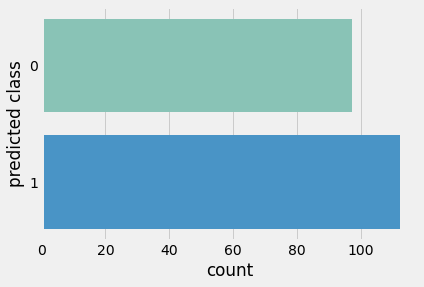

In [ ]:
y_pred = pd.DataFrame(pred_bank, columns=['predicted class'])
sns.countplot(y=y_pred['predicted class'], data=y_pred, palette=['#7fcdbb',"#3498db"], order=y_pred['predicted class'].value_counts().sort_values().index)

Text(0, 0.5, 'Actual')

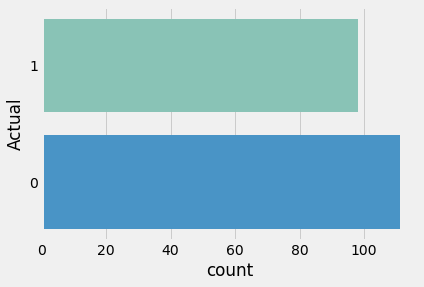

In [ ]:
y_test = y_bank_test.reset_index()
y_test.drop(columns=['index'],inplace=True)
sns.countplot(y=y_test['y'], data=y_test, palette=['#7fcdbb',"#3498db"], order=y_test['y'].value_counts().sort_values().index)
plt.ylabel("Actual")